In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import colors 

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Tahoma']

%config InlineBackend.figure_format = 'retina'

## Graph 1 

In [34]:
language = ['Hindi', 'Bengali', 'Telugu', 'Marathi', 'Tamil', 'Urdu', 'Gujarati', 'Kannada', 'Malayalam', 'Other']
percents = [46.2, 9.1, 8.1, 7.9, 6.7, 5.6, 5, 4.2, 3.6, 3.6]

![alt text](BadGraph1.png "Title")

A bar chart seemed like a great alternative to this way too colorful and cramped pie chart. I highlighted the important bar in a different color and an annotation to emphasize its importance. I also removed all axes spines to make the data stand out more. I added a subtitle to better introduce the story and help answer some obvious questions that the audience may naturally ask about the data.

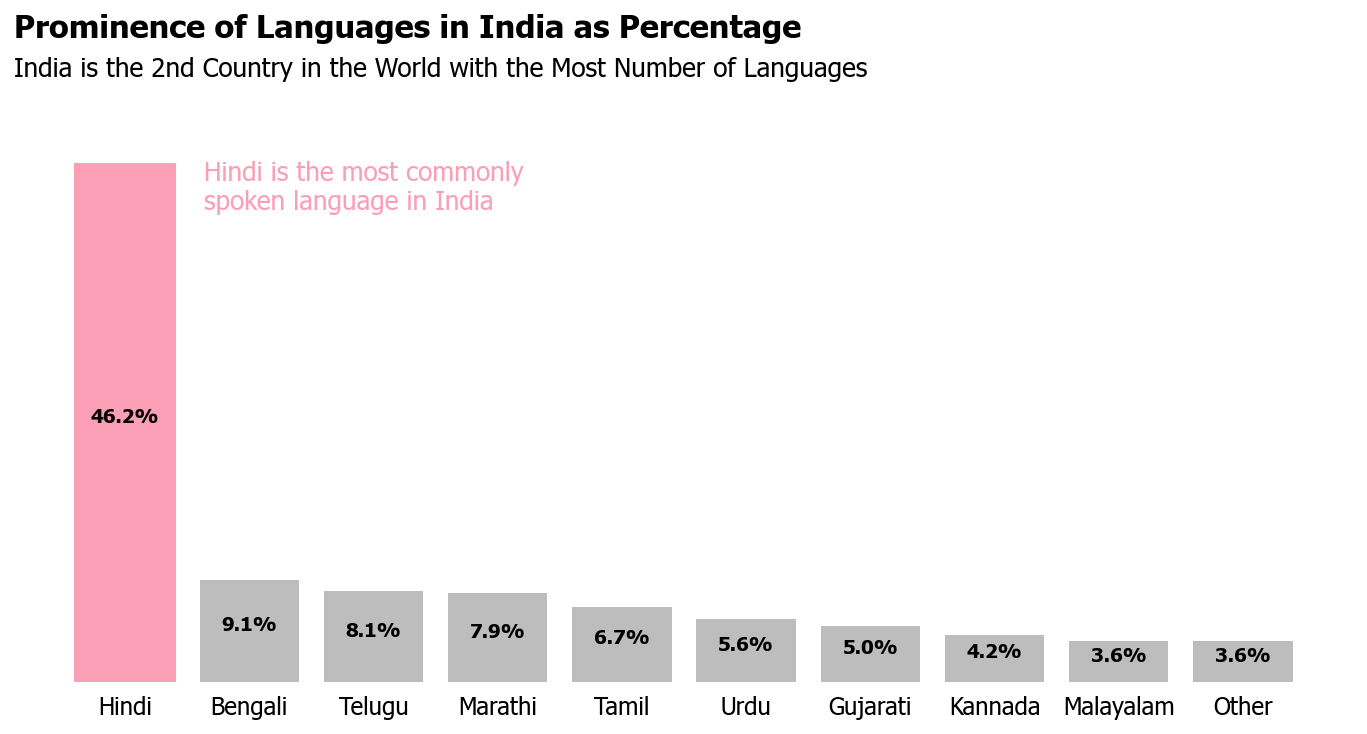

In [97]:
fig, ax = plt.subplots(figsize=(12,5))

barcontainers = ax.bar(language, percents, color="#bdbdbd")
barcontainers[0].set_color('#fa9fb5')

ax.set_title("Prominence of Languages in India as Percentage", loc='left', fontweight='bold', fontsize=16, pad=50)
ax.text(0.125,0.965,'India is the 2nd Country in the World with the Most Number of Languages',
        transform=fig.transFigure, fontsize=13)
ax.text(0.235,0.78,'Hindi is the most commonly\nspoken language in India',
        color='#fa9fb5', transform=fig.transFigure, fontsize=13)
    
ax.get_yaxis().set_visible(False)
ax.xaxis.set_ticks_position('none')
ax.tick_params(labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*0.5), ha='center', fontweight='bold')

plt.show()

## Graph 2 

![alt text](BadGraph4.png "Title")

The above graph has no title, random colors that don't mean anything, and axis labels that are hard to understand. I wanted to separate this graph into 2 that depict movies and TV shows and when they have each been most released on netflix throughout the years in this dataset. I created a horizontal stacked bar graph with a colorbar that shows the amount of new content released. 

In [185]:
df_netflix = pd.read_csv("netflix_titles.csv")

len(df_netflix)

6234

In [186]:
df_netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


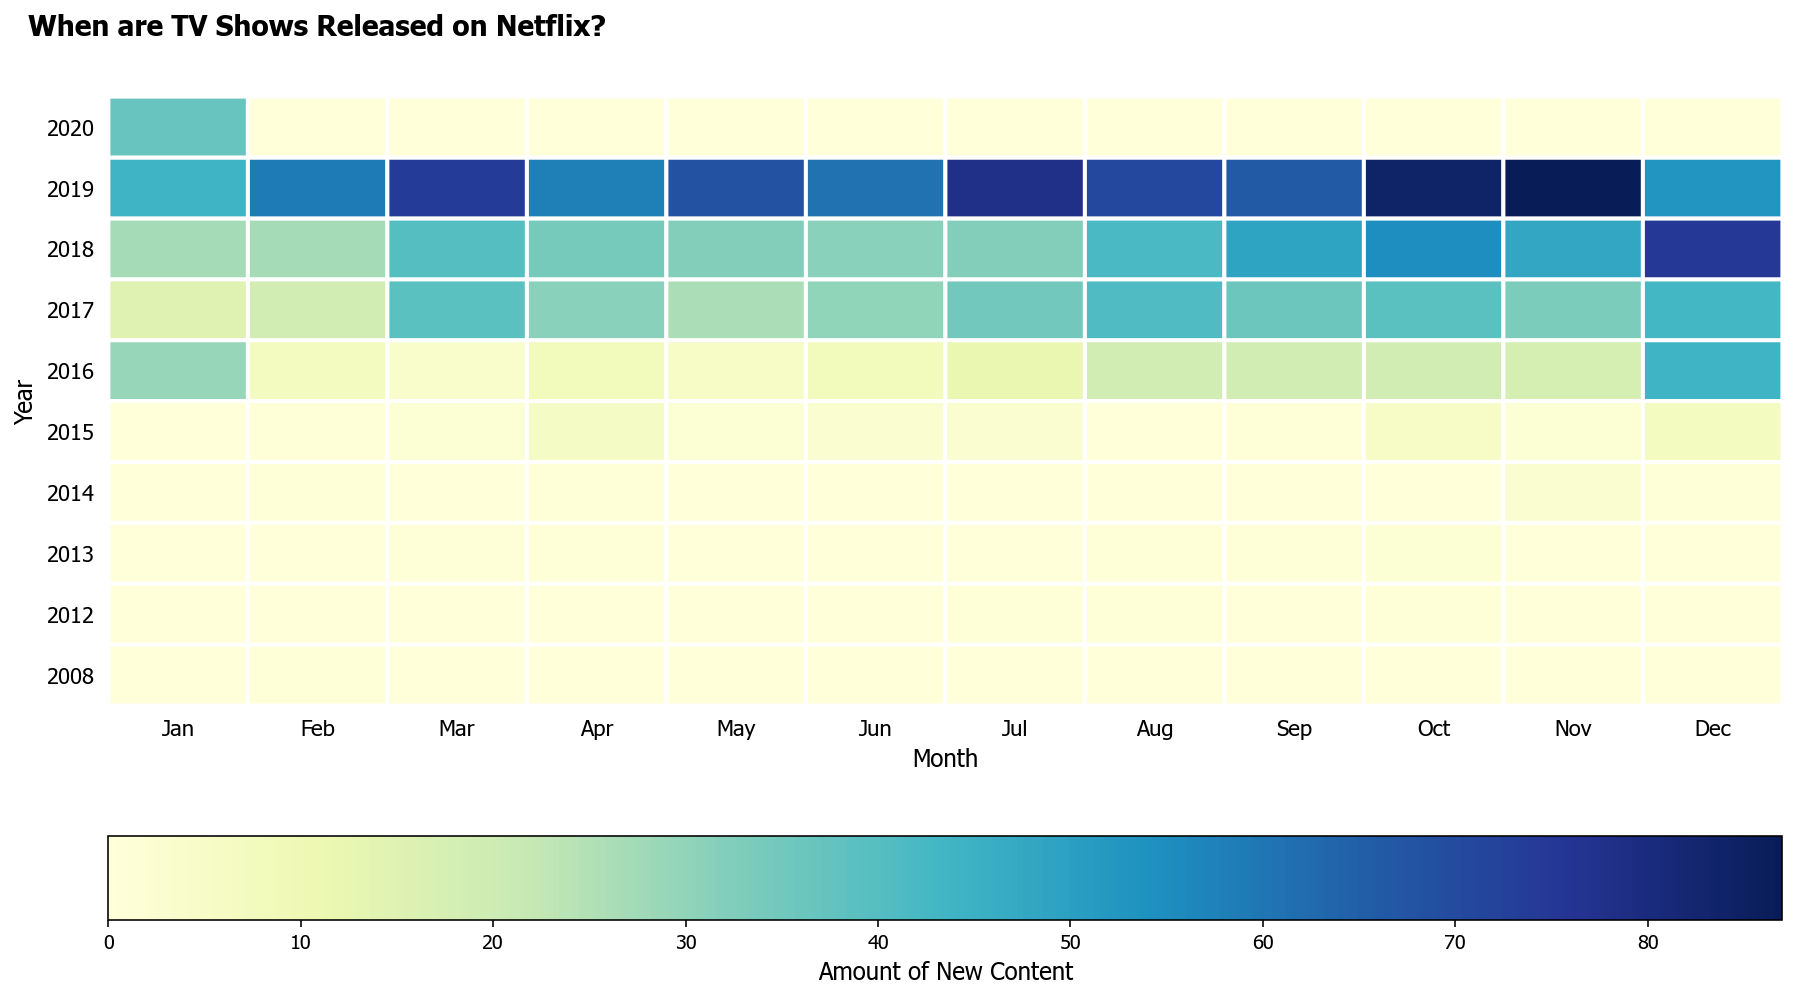

In [220]:
# Graph for TV Shows

netflix_shows=df_netflix[df_netflix['type']=='TV Show']

netflix_date = netflix_shows[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               #'July', 'August', 'September', 'October', 'November', 'December'][::-1]
#df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]

fig, ax = plt.subplots(figsize=(15,8))
plt.pcolor(df, cmap='YlGnBu', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.text(-0.575, 11,'When are TV Shows Released on Netflix?', fontsize=14, fontweight='bold')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(labelsize=11)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep' ,'Oct','Nov','Dec'])
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Year", fontsize=12)

cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label("Amount of New Content", fontsize=12)

plt.show()

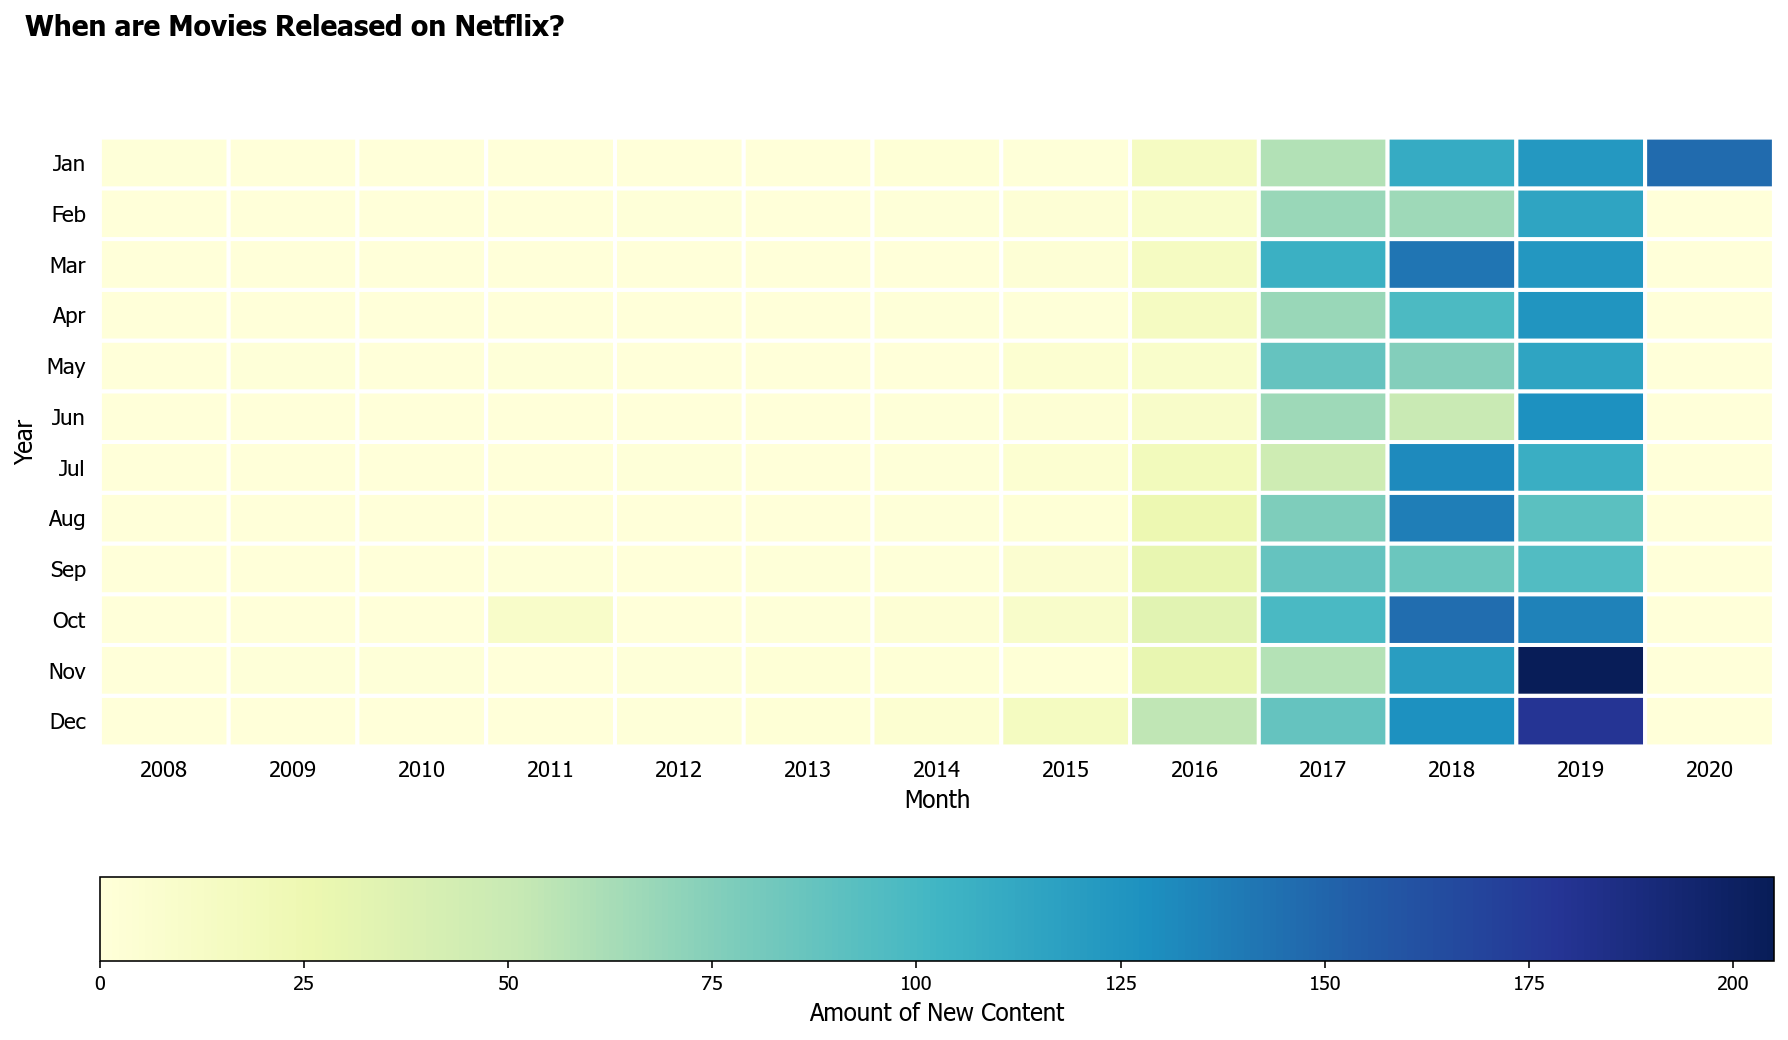

In [225]:
# Graph for Movies

netflix_movies=df_netflix[df_netflix['type']=='Movie']

netflix_date = netflix_movies[['date_added']].dropna()
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December'][::-1]
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
#month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               #'July', 'August', 'September', 'October', 'November', 'December']
#df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order]

fig, ax = plt.subplots(figsize=(15,8))
plt.pcolor(df, cmap='YlGnBu', edgecolors='white', linewidths=2) # heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=7)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=7)

plt.text(-0.58, 14,'When are Movies Released on Netflix?', fontsize=14, fontweight='bold')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.tick_params(labelsize=11)
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
ax.set_yticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep' ,'Oct','Nov','Dec'][::-1])
ax.set_xlabel("Month", fontsize=12)
ax.set_ylabel("Year", fontsize=12)

cbar = plt.colorbar(orientation='horizontal')
cbar.ax.tick_params(labelsize=10) 
cbar.set_label("Amount of New Content", fontsize=12)

plt.show()